In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

bins = [45, 60, 100, 140]:

This list defines the bin edges that would typically be used to categorize continuous data (in this case, "Annual Income") into discrete intervals. However, in this specific snippet, the bins list is not directly used in the pd.qcut function.
labels = ["Low", "Average", "Above Average", "High"]:

This list contains the labels that will be assigned to each category (or bin) that the income values fall into. For example, incomes that fall into the lowest range would be labeled as "Low," and those in the highest range would be labeled as "High."
pd.qcut(df["Annual Income (k$)"], q=4, labels=labels):

pd.qcut is a pandas function used to divide the data into quantiles. The q=4 argument specifies that the data should be divided into 4 equal-sized quantiles (i.e., quarters).
The labels=labels argument assigns the labels defined earlier to these quantiles.
The result is a new column in the DataFrame df called 'Income Segment', where each value in the "Annual Income (k$)" column is categorized into one of the four segments: "Low," "Average," "Above Average," or "High," based on its position in the distribution.


In [8]:
bins = [45, 60, 100, 140]
labels = ["Low", "Average", "Above Average", "High"]
df['Income Segment'] = pd.qcut(df["Annual Income (k$)"], q=4, labels=labels)

In [15]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Segment
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Low
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Low
4,5,Female,31,17,40,Low
5,6,Female,22,17,76,Low
6,7,Female,35,18,6,Low
7,8,Female,23,18,94,Low
8,9,Male,64,19,3,Low
9,10,Female,30,19,72,Low


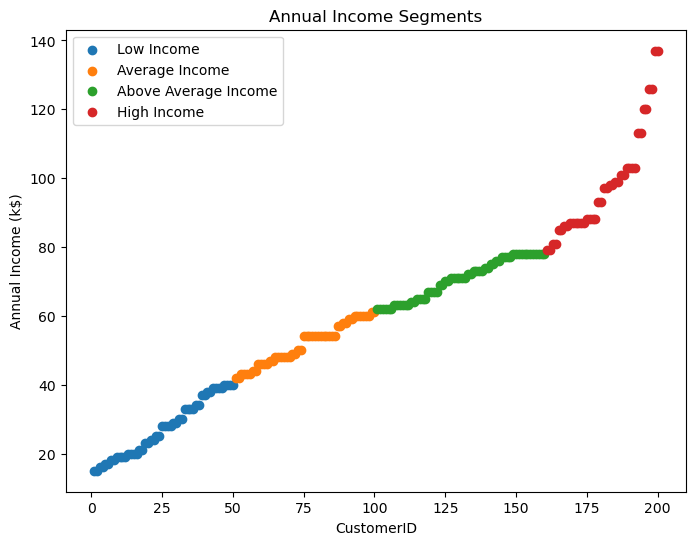

In [18]:
# Creates a new figure for plotting with a specified size of 8 inches by 6 inches.
plt.figure(figsize=(8, 6))

# Iterates over each unique value in the "Income Segment" column of the DataFrame df.
for segment in df["Income Segment"].unique():
    segment_data = df[df["Income Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Annual Income (k$)"], label = f"{segment} Income")
    
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income Segments')

plt.legend()
# plt.legend(): Uses the labels provided in plt.scatter() to create a legend,
#               which maps each color to the corresponding income segment.

plt.show()

# Here are some of the key types of plots you can create with Seaborn:

WHAT IS SEABORN???
-Seaborn is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn makes it easy to generate complex visualizations with less code and offers a range of built-in themes and color palettes to enhance the aesthetic appeal of plots.

Histograms:

sns.histplot(): Creates histograms to visualize the distribution of a single variable.
Distribution Plots:

sns.displot(): A figure-level function that combines histograms and KDEs.
Scatter Plots:

sns.scatterplot(): Plots data points for two continuous variables.
Line Plots:

sns.lineplot(): Plots data points connected by lines to show trends over time or other continuous variables.
Box Plots:

sns.boxplot(): Displays the distribution of data through quartiles, highlighting outliers.
Violin Plots:

sns.violinplot(): Combines aspects of box plots and KDEs to show the distribution of data.
Pair Plots:

sns.pairplot(): Plots pairwise relationships in a dataset, useful for visualizing correlations between multiple variables.
Heatmaps:

sns.heatmap(): Visualizes data in matrix form, with colors representing values.
Facet Grids:

sns.FacetGrid(): Allows for plotting multiple plots based on subsets of data.
Bar Plots:

sns.barplot(): Displays the average value of a variable across different categories.
Count Plots:

sns.countplot(): Shows the count of observations in each categorical bin.
Regressions:

sns.regplot(): Plots data points and fits a regression line to them.

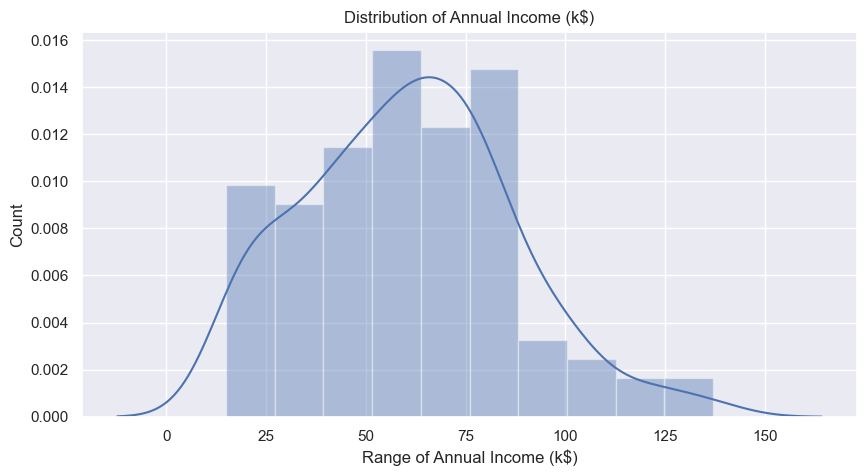

In [32]:
plt.figure(figsize=(10, 5))
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# The histogram shows the frequency of income values within certain ranges (bins).
# The KDE(Kernel Density Estimation) curve provides a smooth estimate of the distribution's shape, helping to visualize 
# the underlying distribution of the data.

In [23]:
bins = [25, 50, 70, 100]
labels = ["Low", "Average", "Above Average", "High"]
df['Spending Segment'] = pd.qcut(df["Spending Score (1-100)"], q=4, labels=labels)

In [26]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Segment,Spending Segment
0,1,Male,19,15,39,Low,Average
1,2,Male,21,15,81,Low,High
2,3,Female,20,16,6,Low,Low
3,4,Female,23,16,77,Low,High
4,5,Female,31,17,40,Low,Average


In [27]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Segment,Spending Segment
195,196,Female,35,120,79,High,High
196,197,Female,45,126,28,High,Low
197,198,Male,32,126,74,High,High
198,199,Male,32,137,18,High,Low
199,200,Male,30,137,83,High,High


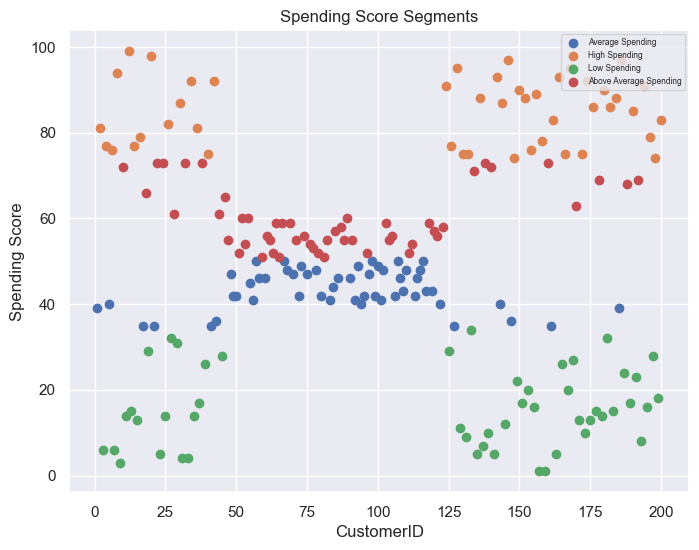

In [28]:
plt.figure(figsize=(8, 6))
for segment in df["Spending Segment"].unique():
    segment_data = df[df["Spending Segment"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Spending Score (1-100)"], label=f"{segment} Spending")

plt.xlabel("CustomerID")
plt.ylabel('Spending Score')
plt.title('Spending Score Segments')

plt.legend(loc="upper right", fontsize=6)
plt.show()

In [29]:
df.drop(['Spending Segment', 'Income Segment'], axis=1, inplace=True)

<Axes: >

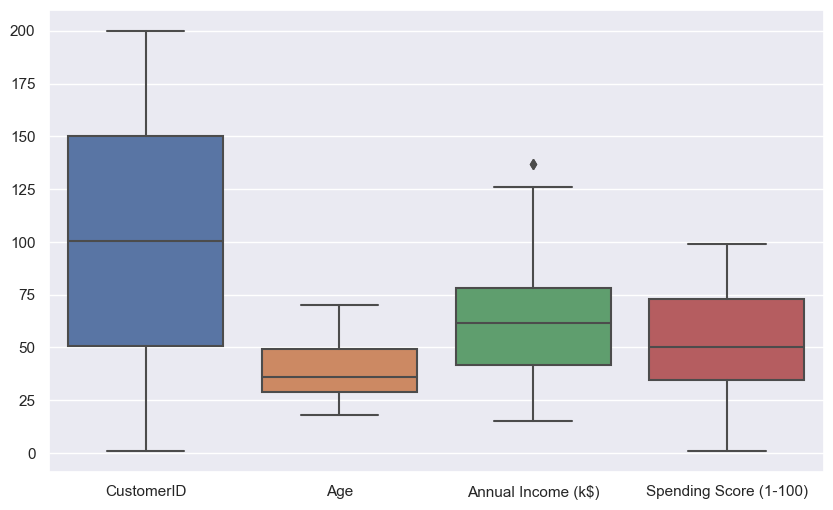

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

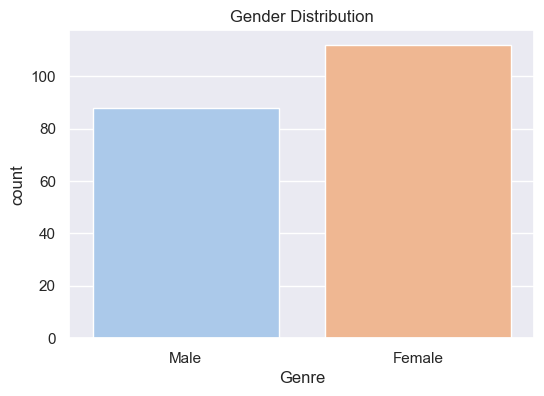

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

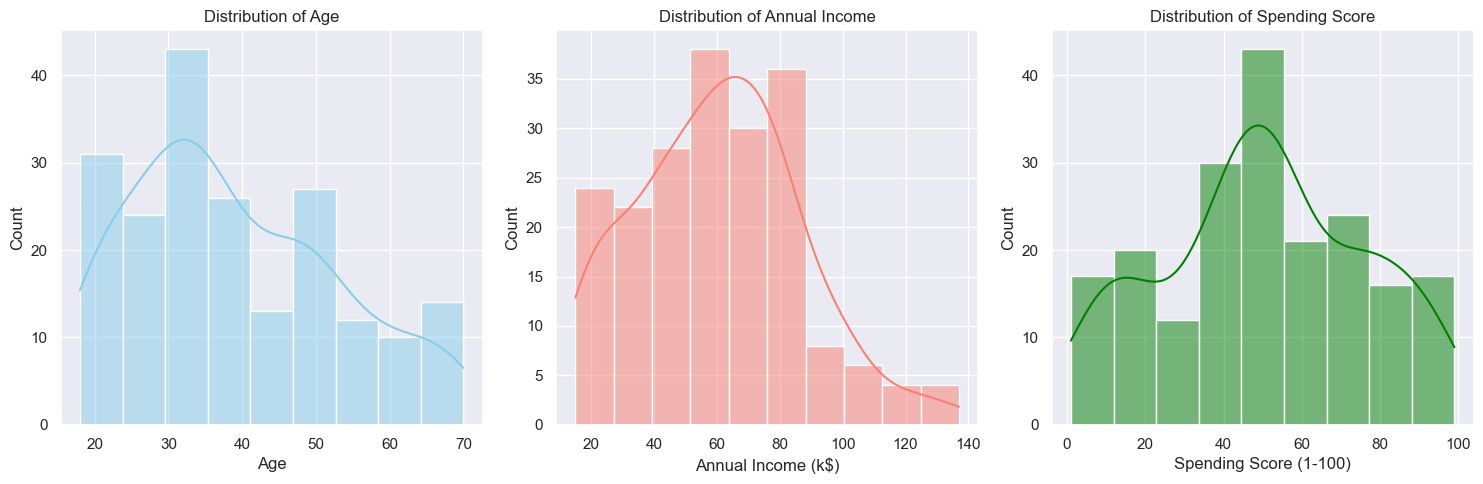

In [34]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='salmon')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()


Pair Plot: Creates a grid of scatter plots and histograms (or KDE plots) for each pair of numerical variables in the DataFrame.
    
Diagonal Plots: By default, shows histograms of each variable on the diagonal, providing the distribution of each variable.
    
Off-Diagonal Plots: Shows scatter plots for each pair of variables, helping you visualize the relationships and correlations between them.
    
Hue Parameter: Uses different colors for different categories in the "Genre" column, making it easy to see how data points in different genres are distributed and related.

<Figure size 1000x1500 with 0 Axes>

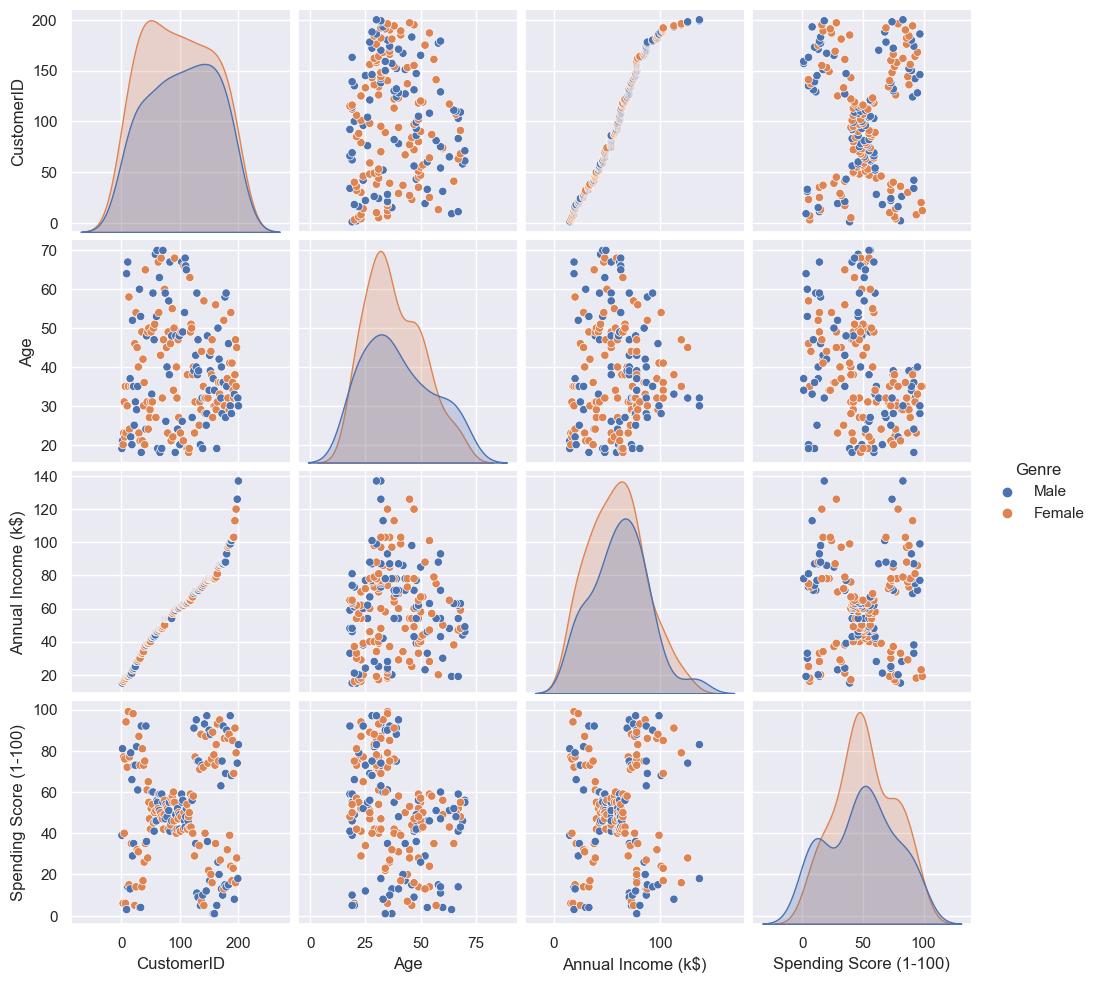

In [35]:
plt.figure(figsize=(10,15))
sns.pairplot(data=df,hue="Genre")
plt.show()

# KMEANS

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract relevant features
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features to have zero mean and unit variance. This is important because K-Means
# uses distance metrics which are affected by the scale of the features.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

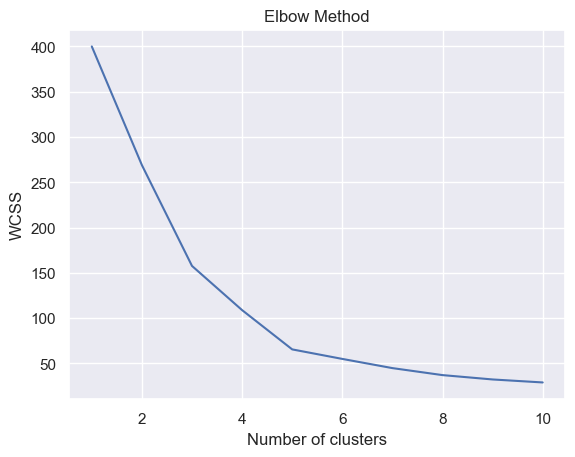

In [37]:
import matplotlib.pyplot as plt

# Calculate WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


KMeans initializes the K-Means algorithm with:

    n_clusters=i: Number of clusters.
    init='k-means++': Method for initializing cluster centers.
    max_iter=300: Maximum number of iterations for convergence.
    n_init=10: Number of times the algorithm will be run with different centroid seeds.
    random_state=0: Seed for random number generation to ensure reproducibility.

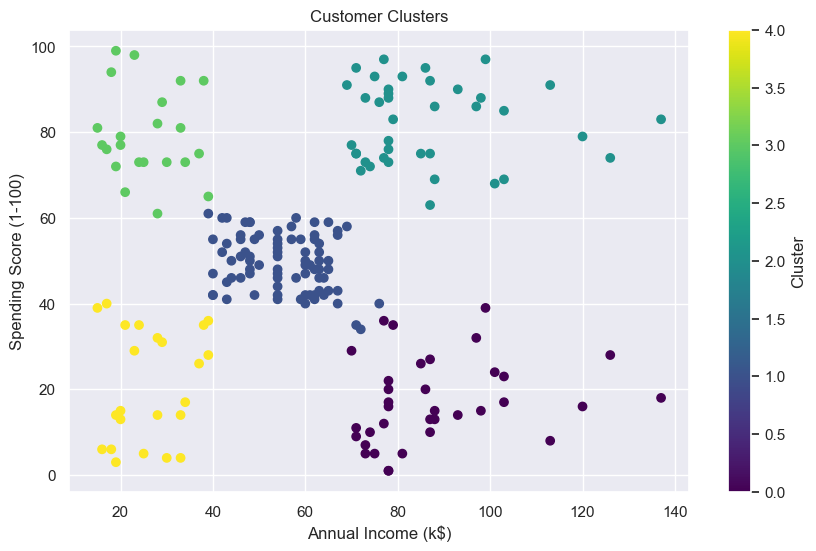

In [39]:
# Fit K-Means with the chosen number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to the DataFrame
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
# c=df['Cluster'] colors the points based on the cluster they belong to.
# cmap='viridis' specifies the color map for different clusters.

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()


# KNN CLUSTERING

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and labels
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Genre']  # Assuming 'Genre' is the target label for classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [47]:
# Initialize and fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[20 14]
 [17  9]]
              precision    recall  f1-score   support

      Female       0.54      0.59      0.56        34
        Male       0.39      0.35      0.37        26

    accuracy                           0.48        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.48      0.48      0.48        60

